In [6]:
runlist=[1361, 1364, 1365, 1366] # Select LED runs with bias set to 0x600, 0x680, 0x700 and 0x780
DATASET='rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-006-000.root'

from mu2etools import *
from mu2etools import wideband
from scipy.signal import find_peaks
hep.style.use('ATLAS')  # or ATLAS/LHCb2


In [3]:
processor = wideband.DataProcessor(usexroot=True, fixtimes=False, runlist=runlist, userunlist=True, remove=False, 
                                   treename='run', filter_name=["PEs"])
arr = processor.getData(DATASET) # get akward array for "run" tree

In [23]:
arr['PEs'][:,0,0]

<Array [1.02, 0.916, 3.93, ... 54.3, 41.1] type='1555788 * float32'>

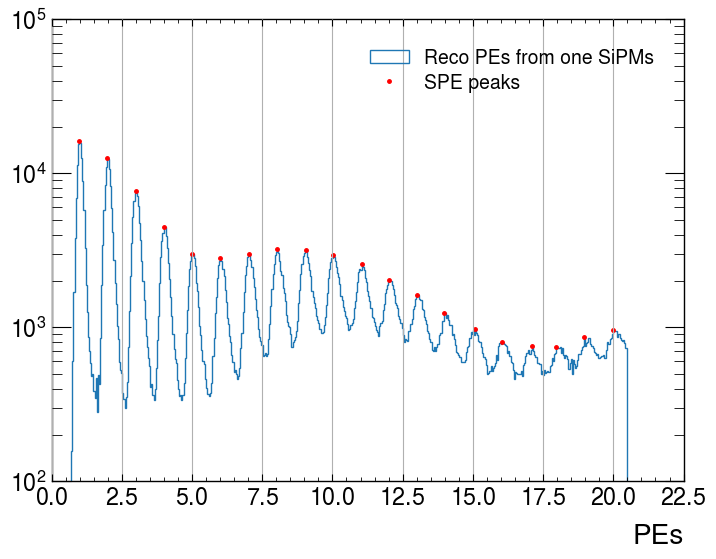

In [40]:
hist, bins, _ = plt.hist(arr['PEs'][:,0,1], histtype='step', bins=500, range=(0.7, maxx+0.5), label="Reco PEs from one SiPMs"); #FEB0
peaks, _ = find_peaks(hist, width=5)
plt.plot(bins[peaks], hist[peaks], "r.", markersize=5, label="SPE peaks")

plt.yscale('log')
plt.xlabel('PEs')
plt.grid(axis='x')
plt.legend();

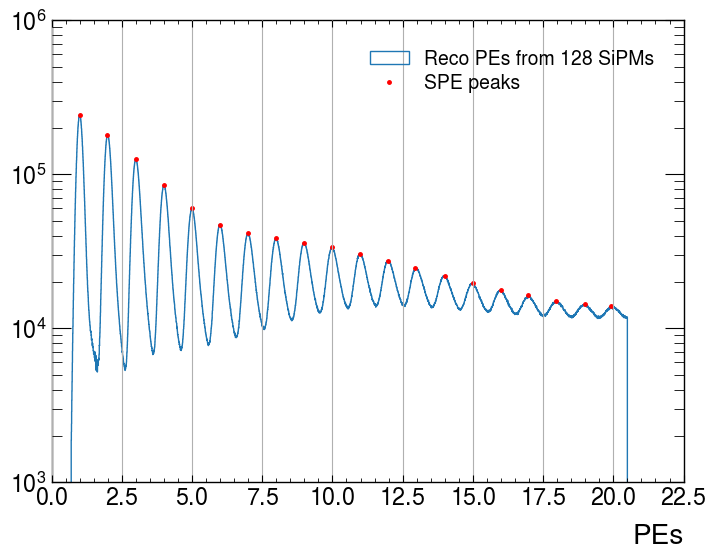

In [18]:
hist, bins, _ = plt.hist(ak.flatten(ak.flatten(arr['PEs'])), histtype='step', bins=4000, range=(0.7, maxx+0.5), label="Reco PEs from 128 SiPMs"); #FEB0
peaks, _ = find_peaks(hist, width=5)
plt.plot(bins[peaks], hist[peaks], "r.", markersize=5, label="SPE peaks")

plt.yscale('log')
plt.xlabel('PEs')
plt.grid(axis='x')
plt.legend();

Coefficients: [0.99808001 0.00210227]
Standard deviations of coefficients: [0.00070188 0.00840787]


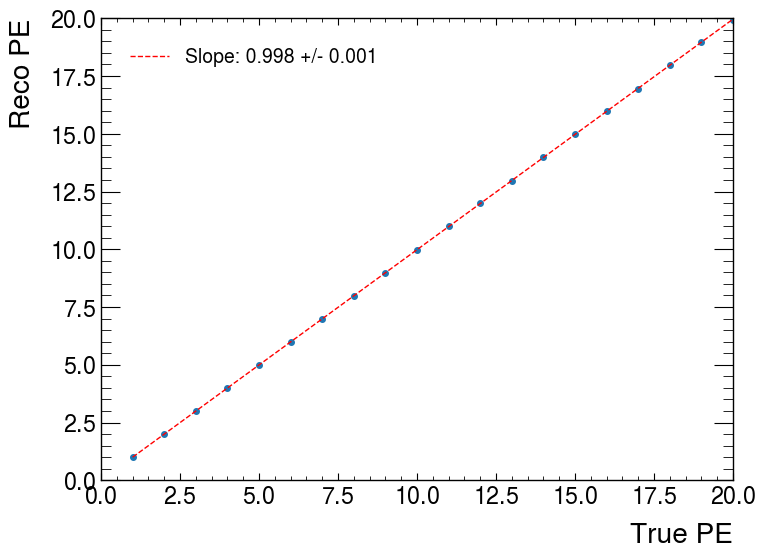

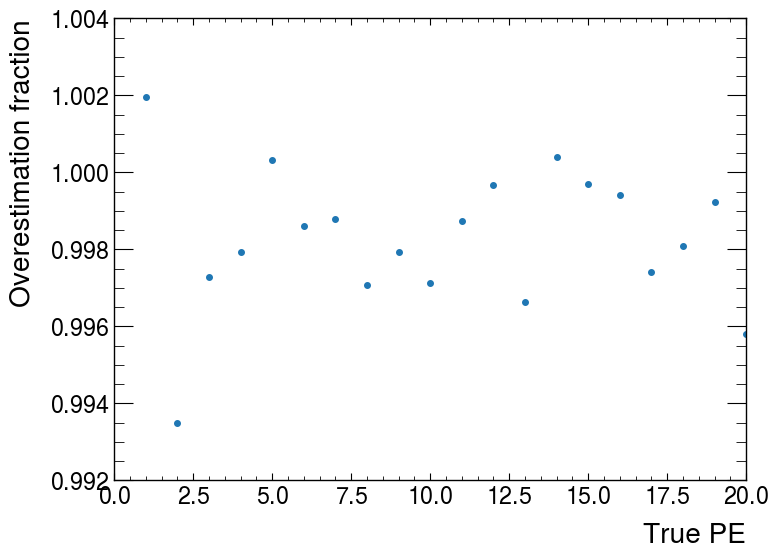

In [15]:
y=bins[peaks]
x=range(1,len(y)+1)
plt.plot(x, y, '.');
coeffs, cov_matrix = np.polyfit(x, y, deg=1, cov=True)

coeffs_std = np.sqrt(np.diag(cov_matrix))
print(f'Coefficients: {coeffs}')
print(f'Standard deviations of coefficients: {coeffs_std}')


line = coeffs[0] * x + coeffs[1]
b=np.float64(0)
plt.plot(x, line, '--r', linewidth=1, label='Slope: %0.3f +/- %.3f'%(coeffs[0], coeffs_std[0]))
plt.xlabel("True PE")
plt.ylabel("Reco PE")
plt.legend();
plt.ylim(0,maxx)

plt.figure()
plt.plot(x, y/x, '.');
plt.xlabel("True PE")
plt.ylabel("Overestimation fraction");
